In [348]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
dataset=pd.read_csv('../dataset/LogisticRegressiondata.csv')
dataset = dataset.drop(['Ad Topic Line', 'City', 'Country', 'Clicked on Ad', 'Male', 'Timestamp'], axis=1)
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,68.95,35,61833.90,256.09
1,80.23,31,68441.85,193.77
2,69.47,26,59785.94,236.50
3,74.15,29,54806.18,245.89
4,68.37,35,73889.99,225.58


In [349]:
# X = dataset.iloc[:, [1, 3]].values # we are taking only third and fourth colulmn
X = dataset.iloc[:, :2].values
X

array([[68.95, 35.  ],
       [80.23, 31.  ],
       [69.47, 26.  ],
       ...,
       [51.63, 51.  ],
       [55.55, 19.  ],
       [45.01, 26.  ]])

In [350]:
# X[:5,:]

In [351]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=1000
K=5 # number of clusters 

In [352]:
m

1000

In [353]:
n

2

In [354]:
K=5 # number of clusters 

In [355]:
centroids=np.zeros([n*K])
centroids=centroids.reshape(n,K)
#Centroids is a n x K dimentional matrix, 
#where each column will be a centroid for one cluster.

In [356]:
centroids

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [357]:
np.shape(centroids)

(2, 5)

In [358]:
centroids

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [359]:
rand=random.randint(0,m-1)

In [360]:
X[rand,:]

array([66.83, 46.  ])

In [361]:
X[197,:]

array([78.57, 36.  ])

In [362]:
for k in range(K): #K times-initialize the centroids randomly from the data points, taking K samples 
#from m samples
    rand=random.randint(0,m-1) #data index is random
    centroids[:,k]=X[rand]
#Centroids is a n x K dimentional matrix, 
#where each column will be a centroid for one cluster.

In [363]:
centroids

array([[61.04, 74.32, 46.77, 87.27, 43.16],
       [41.  , 33.  , 32.  , 30.  , 35.  ]])

In [364]:
''' Step 2.a. For each training example compute the euclidian distance 
from the centroid and assign the cluster based on the minimal distance
The output of our algorithm should be a dictionary with cluster 
number as Keys and the data points which belong to 
that cluster as values. So let’s initialize the dictionary.'''

' Step 2.a. For each training example compute the euclidian distance \nfrom the centroid and assign the cluster based on the minimal distance\nThe output of our algorithm should be a dictionary with cluster \nnumber as Keys and the data points which belong to \nthat cluster as values. So let’s initialize the dictionary.'

In [365]:
EuclidianDistance=np.zeros([m*K])
EuclidianDistance=EuclidianDistance.reshape(m,K)

In [366]:
EuclidianDistance

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [367]:
EuclidianDistance=np.zeros([m*K])
EuclidianDistance=EuclidianDistance.reshape(m,K)
for k in range(K):
       tempDist=np.sum((X-centroids[:,k])**2,axis=1)
       EuclidianDistance[:,k]=tempDist
C=np.argmin(EuclidianDistance,axis=1)+1 #returns the k for which we have minimum distance

'''We find the euclidian distance from 
each point to all the centroids and store in a m X K matrix. 
So every row in EuclidianDistance matrix will have distances 
of that particular data point from all the centroids. 
Next, we are going to find the minimum distance and store 
the index of the column in a vector C.'''

'We find the euclidian distance from \neach point to all the centroids and store in a m X K matrix. \nSo every row in EuclidianDistance matrix will have distances \nof that particular data point from all the centroids. \nNext, we are going to find the minimum distance and store \nthe index of the column in a vector C.'

In [368]:
C

array([2, 2, 2, 2, 2, 3, 4, 1, 2, 2, 5, 4, 1, 4, 5, 2, 1, 2, 1, 2, 2, 4,
       5, 4, 5, 2, 3, 1, 2, 2, 2, 4, 1, 3, 1, 4, 1, 1, 1, 5, 4, 2, 4, 4,
       4, 5, 2, 4, 5, 5, 2, 2, 5, 1, 1, 2, 1, 5, 2, 5, 4, 4, 2, 4, 5, 1,
       1, 5, 2, 2, 3, 1, 1, 5, 5, 2, 3, 4, 1, 1, 2, 2, 1, 1, 2, 1, 2, 3,
       1, 1, 1, 3, 2, 5, 3, 2, 5, 5, 5, 2, 5, 2, 4, 2, 2, 2, 2, 5, 3, 2,
       1, 1, 2, 5, 2, 2, 1, 1, 2, 4, 4, 3, 2, 5, 1, 2, 2, 4, 2, 1, 5, 5,
       3, 2, 5, 3, 5, 5, 2, 2, 4, 5, 1, 2, 1, 5, 1, 2, 1, 1, 3, 2, 5, 2,
       2, 4, 5, 3, 4, 2, 2, 4, 2, 2, 5, 5, 1, 4, 1, 4, 5, 1, 2, 2, 1, 2,
       1, 2, 3, 4, 5, 4, 1, 1, 4, 1, 1, 2, 4, 5, 3, 1, 1, 5, 2, 2, 5, 2,
       2, 2, 1, 2, 5, 2, 2, 3, 2, 4, 1, 5, 2, 5, 2, 1, 2, 2, 1, 3, 5, 5,
       2, 2, 3, 1, 4, 2, 3, 5, 2, 2, 2, 3, 1, 2, 5, 5, 2, 2, 2, 2, 2, 1,
       4, 4, 2, 2, 5, 1, 5, 2, 2, 1, 4, 3, 1, 4, 2, 5, 4, 2, 2, 1, 1, 5,
       4, 1, 2, 2, 3, 2, 5, 2, 2, 2, 2, 3, 4, 4, 4, 4, 5, 3, 5, 2, 5, 2,
       3, 4, 5, 3, 3, 4, 1, 4, 2, 4, 2, 2, 2, 2, 2,

In [369]:
EuclidianDistance

array([[  98.5681,   32.8369,  500.9524,  360.6224,  665.1241],
       [ 468.2561,   38.9281, 1120.5716,   50.5616, 1390.1849],
       [ 296.0649,   72.5225,  551.29  ,  332.84  ,  773.2161],
       ...,
       [ 188.5481,  838.8361,  384.6196, 1711.2096,  327.7409],
       [ 514.1401,  548.3129,  246.0884, 1127.1584,  409.5121],
       [ 481.9609,  908.0761,   39.0976, 1801.9076,   84.4225]])

In [370]:
np.shape(C)

(1000,)

In [371]:
C

array([2, 2, 2, 2, 2, 3, 4, 1, 2, 2, 5, 4, 1, 4, 5, 2, 1, 2, 1, 2, 2, 4,
       5, 4, 5, 2, 3, 1, 2, 2, 2, 4, 1, 3, 1, 4, 1, 1, 1, 5, 4, 2, 4, 4,
       4, 5, 2, 4, 5, 5, 2, 2, 5, 1, 1, 2, 1, 5, 2, 5, 4, 4, 2, 4, 5, 1,
       1, 5, 2, 2, 3, 1, 1, 5, 5, 2, 3, 4, 1, 1, 2, 2, 1, 1, 2, 1, 2, 3,
       1, 1, 1, 3, 2, 5, 3, 2, 5, 5, 5, 2, 5, 2, 4, 2, 2, 2, 2, 5, 3, 2,
       1, 1, 2, 5, 2, 2, 1, 1, 2, 4, 4, 3, 2, 5, 1, 2, 2, 4, 2, 1, 5, 5,
       3, 2, 5, 3, 5, 5, 2, 2, 4, 5, 1, 2, 1, 5, 1, 2, 1, 1, 3, 2, 5, 2,
       2, 4, 5, 3, 4, 2, 2, 4, 2, 2, 5, 5, 1, 4, 1, 4, 5, 1, 2, 2, 1, 2,
       1, 2, 3, 4, 5, 4, 1, 1, 4, 1, 1, 2, 4, 5, 3, 1, 1, 5, 2, 2, 5, 2,
       2, 2, 1, 2, 5, 2, 2, 3, 2, 4, 1, 5, 2, 5, 2, 1, 2, 2, 1, 3, 5, 5,
       2, 2, 3, 1, 4, 2, 3, 5, 2, 2, 2, 3, 1, 2, 5, 5, 2, 2, 2, 2, 2, 1,
       4, 4, 2, 2, 5, 1, 5, 2, 2, 1, 4, 3, 1, 4, 2, 5, 4, 2, 2, 1, 1, 5,
       4, 1, 2, 2, 3, 2, 5, 2, 2, 2, 2, 3, 4, 4, 4, 4, 5, 3, 5, 2, 5, 2,
       3, 4, 5, 3, 3, 4, 1, 4, 2, 4, 2, 2, 2, 2, 2,

In [372]:
np.shape(C)

(1000,)

In [373]:
C1ind=np.where(C==1)#indexes of the samples in cluster1
C2ind=np.where(C==2)#indexes of the samples in cluster2
C3ind=np.where(C==3)#indexes of the samples in cluster3
C4ind=np.where(C==4)#indexes of the samples in cluster4
C5ind=np.where(C==5)#indexes of the samples in cluster5

In [374]:
C2ind

(array([  0,   1,   2,   3,   4,   8,   9,  15,  17,  19,  20,  25,  28,
         29,  30,  41,  46,  50,  51,  55,  58,  62,  68,  69,  75,  80,
         81,  84,  86,  92,  95,  99, 101, 103, 104, 105, 106, 109, 112,
        114, 115, 118, 122, 125, 126, 128, 133, 138, 139, 143, 147, 151,
        153, 154, 159, 160, 162, 163, 172, 173, 175, 177, 187, 194, 195,
        197, 198, 199, 201, 203, 204, 206, 210, 212, 214, 215, 220, 221,
        225, 228, 229, 230, 233, 236, 237, 238, 239, 240, 244, 245, 249,
        250, 256, 259, 260, 266, 267, 269, 271, 272, 273, 274, 283, 285,
        294, 296, 297, 298, 299, 300, 303, 310, 312, 313, 315, 316, 317,
        327, 328, 331, 333, 337, 338, 339, 344, 345, 348, 350, 351, 352,
        353, 362, 363, 366, 367, 368, 372, 374, 375, 378, 379, 380, 382,
        383, 385, 390, 391, 393, 395, 398, 399, 405, 411, 412, 416, 417,
        418, 421, 437, 439, 441, 445, 447, 449, 452, 454, 455, 462, 469,
        471, 472, 475, 476, 482, 485, 487, 489, 494

In [375]:
Y1=X[C1ind]#Group of samples in cluster1
Y2=X[C2ind]#Group of samples in cluster2
Y3=X[C3ind]#Group of samples in cluster3
Y4=X[C4ind]#Group of samples in cluster4
Y5=X[C5ind]#Group of samples in cluster5
C1=Y1.mean(axis=0)#mean value of cluster1
C2=Y2.mean(axis=0)#mean value of cluster2
C3=Y3.mean(axis=0)#mean value of cluster3
C4=Y4.mean(axis=0)#mean value of cluster4
C5=Y5.mean(axis=0)#mean value of cluster5

In [376]:
C2

array([74.33168067, 31.08403361])

In [377]:
np.shape(Y1)

(205, 2)

In [378]:
Y1

array([[66.  , 48.  ],
       [69.57, 48.  ],
       [55.39, 37.  ],
       [54.7 , 36.  ],
       [51.95, 52.  ],
       [59.05, 57.  ],
       [57.64, 57.  ],
       [62.26, 53.  ],
       [65.82, 39.  ],
       [50.43, 46.  ],
       [50.33, 50.  ],
       [62.31, 47.  ],
       [65.19, 36.  ],
       [62.42, 29.  ],
       [63.89, 40.  ],
       [69.01, 46.  ],
       [55.35, 39.  ],
       [56.14, 38.  ],
       [55.13, 45.  ],
       [56.64, 38.  ],
       [68.94, 54.  ],
       [57.76, 41.  ],
       [57.7 , 34.  ],
       [56.89, 37.  ],
       [69.9 , 43.  ],
       [66.63, 60.  ],
       [63.24, 53.  ],
       [72.6 , 55.  ],
       [61.88, 42.  ],
       [62.33, 43.  ],
       [67.36, 37.  ],
       [55.6 , 44.  ],
       [69.08, 41.  ],
       [56.04, 49.  ],
       [49.78, 46.  ],
       [68.61, 57.  ],
       [66.18, 55.  ],
       [59.59, 42.  ],
       [71.84, 47.  ],
       [63.36, 48.  ],
       [60.72, 44.  ],
       [62.95, 60.  ],
       [67.58, 41.  ],
       [46.

In [379]:
Y2

array([[68.95, 35.  ],
       [80.23, 31.  ],
       [69.47, 26.  ],
       [74.15, 29.  ],
       [68.37, 35.  ],
       [74.53, 30.  ],
       [69.88, 20.  ],
       [63.45, 23.  ],
       [82.03, 41.  ],
       [74.58, 40.  ],
       [77.22, 30.  ],
       [78.74, 28.  ],
       [70.2 , 34.  ],
       [76.02, 22.  ],
       [67.64, 35.  ],
       [64.24, 30.  ],
       [69.62, 20.  ],
       [73.18, 23.  ],
       [79.94, 28.  ],
       [80.6 , 31.  ],
       [77.63, 29.  ],
       [72.08, 29.  ],
       [75.74, 25.  ],
       [78.53, 34.  ],
       [64.1 , 22.  ],
       [78.11, 27.  ],
       [73.46, 28.  ],
       [70.79, 31.  ],
       [77.51, 36.  ],
       [70.03, 26.  ],
       [72.84, 26.  ],
       [79.71, 34.  ],
       [63.6 , 23.  ],
       [68.18, 21.  ],
       [66.49, 20.  ],
       [80.49, 40.  ],
       [72.23, 25.  ],
       [74.02, 32.  ],
       [71.  , 22.  ],
       [69.  , 32.  ],
       [76.99, 31.  ],
       [84.45, 50.  ],
       [77.65, 27.  ],
       [79.

In [380]:
for k in range(K): #K times-initialize the centroids randomly from the data points, taking K samples 
#from m samples
    rand=random.randint(0,m-1) #data index is random
    centroids[:,k]=X[rand]
    n_iter=200
for i in range(n_iter):
  for k in range(K):
       tempDist=np.sum((X-centroids[:,k])**2,axis=1)
       EuclidianDistance[:,k]=tempDist 
  C=np.argmin(EuclidianDistance,axis=1)+1 #returns the k for which we have minimum distance
  C1ind=np.where(C==1)
  C2ind=np.where(C==2)
  C3ind=np.where(C==3)
  C4ind=np.where(C==4)
  C5ind=np.where(C==5)
  Y1=X[C1ind]
  Y2=X[C2ind]
  Y3=X[C3ind]
  Y4=X[C4ind]
  Y5=X[C5ind]
  C1=Y1.mean(axis=0)
  C2=Y2.mean(axis=0)
  C3=Y3.mean(axis=0)
  C4=Y4.mean(axis=0)
  C5=Y5.mean(axis=0)
  centroids[:,0]=C1
  centroids[:,1]=C2
  centroids[:,2]=C3
  centroids[:,3]=C4
  centroids[:,4]=C5

In [381]:
C

array([3, 4, 3, 3, 3, 3, 4, 2, 3, 3, 5, 4, 2, 4, 1, 3, 1, 4, 1, 4, 4, 4,
       5, 4, 1, 4, 1, 5, 3, 3, 3, 4, 2, 3, 2, 4, 2, 2, 5, 1, 4, 3, 4, 4,
       4, 5, 3, 4, 1, 5, 3, 4, 5, 5, 2, 4, 3, 5, 4, 1, 4, 4, 3, 4, 5, 3,
       2, 1, 3, 4, 1, 2, 2, 5, 5, 3, 1, 4, 2, 2, 4, 3, 2, 2, 3, 2, 4, 1,
       3, 2, 2, 3, 3, 1, 1, 3, 1, 1, 5, 4, 5, 3, 4, 3, 3, 4, 3, 5, 1, 3,
       2, 2, 3, 5, 3, 4, 2, 2, 4, 4, 4, 1, 4, 1, 2, 4, 4, 4, 3, 3, 5, 1,
       1, 4, 5, 1, 1, 1, 3, 4, 4, 1, 2, 4, 2, 5, 2, 2, 5, 2, 3, 4, 5, 3,
       4, 4, 1, 1, 4, 4, 4, 4, 3, 3, 5, 1, 2, 4, 2, 4, 5, 2, 4, 3, 2, 3,
       2, 3, 1, 4, 1, 4, 2, 2, 4, 5, 5, 4, 4, 1, 1, 3, 2, 5, 4, 3, 5, 4,
       3, 4, 2, 3, 1, 3, 3, 3, 4, 4, 2, 1, 4, 1, 4, 2, 4, 3, 2, 1, 1, 1,
       4, 3, 1, 2, 4, 4, 3, 1, 3, 3, 3, 1, 2, 4, 5, 5, 4, 3, 4, 3, 4, 2,
       4, 4, 3, 2, 5, 2, 5, 3, 4, 2, 4, 1, 2, 4, 4, 1, 4, 3, 3, 3, 3, 5,
       4, 2, 3, 3, 1, 4, 5, 4, 4, 3, 3, 1, 4, 4, 4, 4, 5, 3, 1, 3, 5, 3,
       3, 4, 5, 3, 1, 4, 2, 4, 3, 4, 4, 3, 4, 3, 3,

In [382]:
C3

array([67.97246637, 27.80269058])

In [383]:
C1

array([43.90496933, 34.49079755])

In [384]:
np.shape(C1)

(2,)

In [385]:
C1

array([43.90496933, 34.49079755])

In [386]:
np.shape(C1)

(2,)

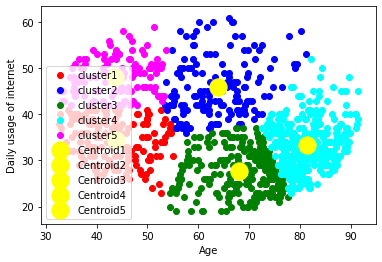

In [387]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
plt.scatter(Y1[:,0],Y1[:,1],c=color[0],label=labels[0])
plt.scatter(Y2[:,0],Y2[:,1],c=color[1],label=labels[1])
plt.scatter(Y3[:,0],Y3[:,1],c=color[2],label=labels[2])
plt.scatter(Y4[:,0],Y4[:,1],c=color[3],label=labels[3])
plt.scatter(Y5[:,0],Y5[:,1],c=color[4],label=labels[4])
plt.scatter(C1[0],C1[1],s=300,c='yellow',label='Centroid1')
plt.scatter(C2[0],C2[1],s=300,c='yellow',label='Centroid2')
plt.scatter(C3[0],C3[1],s=300,c='yellow',label='Centroid3')
plt.scatter(C4[0],C4[1],s=300,c='yellow',label='Centroid4')
plt.scatter(C5[0],C5[1],s=300,c='yellow',label='Centroid5')
plt.xlabel('Age')
plt.ylabel('Daily usage of internet')
plt.legend()
plt.show()

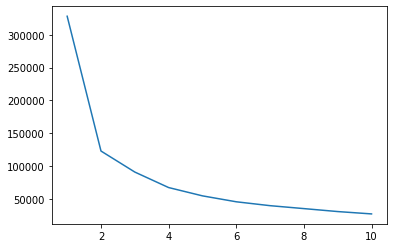

In [388]:
from sklearn.cluster import KMeans
cost=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmeans.fit(X)
  cost.append(kmeans.inertia_)
plt.plot(range(1,11),cost)